In [1]:
# %pip install seaborn

import pandas as pd
import seaborn as sns

## Data Preprocess

In [2]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]
training_data = pd.read_csv('adult.data', names=names, skipinitialspace=True)
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Preprocessing

In [3]:
# Drop any rows with missing values
training_data = training_data.dropna()
# training_data["workclass"].value_counts()

# Normalizing the data 
most_common_workclass = training_data["workclass"].mode()[0]
most_common_occupation = training_data["occupation"].mode()[0]
most_common_country = training_data["native-country"].mode()[0]

training_data['workclass'].replace('?', most_common_workclass, inplace=True)
training_data['occupation'].replace('?', most_common_occupation, inplace=True)
training_data['native-country'].replace('?', most_common_country, inplace=True)

In [4]:
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Label Encoding

In [5]:
# %pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 
                       'education', 
                       'marital-status', 
                       'occupation', 
                       'relationship', 
                       'race', 
                       'sex', 
                       'native-country', 
                       'income']

for col in categorical_columns:
    training_data[col] = label_encoder.fit_transform(training_data[col])

# Split the data into features (X) and target variable (y)
X = training_data.drop('income', axis=1)
y = training_data['income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Classification Model

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Pattern Extraction

In [7]:
# Get feature importances
feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns)
sorted_importance = feature_importance.sort_values(ascending=False)

print("Feature Importance:\n", sorted_importance)


Feature Importance:
 fnlwgt            0.203232
relationship      0.199797
age               0.123651
capital-gain      0.113180
education-num     0.113111
hours-per-week    0.067000
occupation        0.057566
capital-loss      0.038533
workclass         0.034507
race              0.016925
native-country    0.012270
education         0.009641
marital-status    0.007754
sex               0.002835
dtype: float64


In [8]:
from sklearn.tree import export_text

# Visualize the decision tree
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)


Decision Tree Rules:
 |--- relationship <= 0.50
|   |--- education-num <= 12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- capital-loss <= 1782.50
|   |   |   |   |--- education-num <= 9.50
|   |   |   |   |   |--- education-num <= 7.50
|   |   |   |   |   |   |--- hours-per-week <= 43.50
|   |   |   |   |   |   |   |--- education <= 0.50
|   |   |   |   |   |   |   |   |--- hours-per-week <= 41.50
|   |   |   |   |   |   |   |   |   |--- capital-loss <= 742.50
|   |   |   |   |   |   |   |   |   |   |--- native-country <= 5.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- native-country >  5.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |--- capital-loss >  742.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- hours-per-week >  41.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   | 

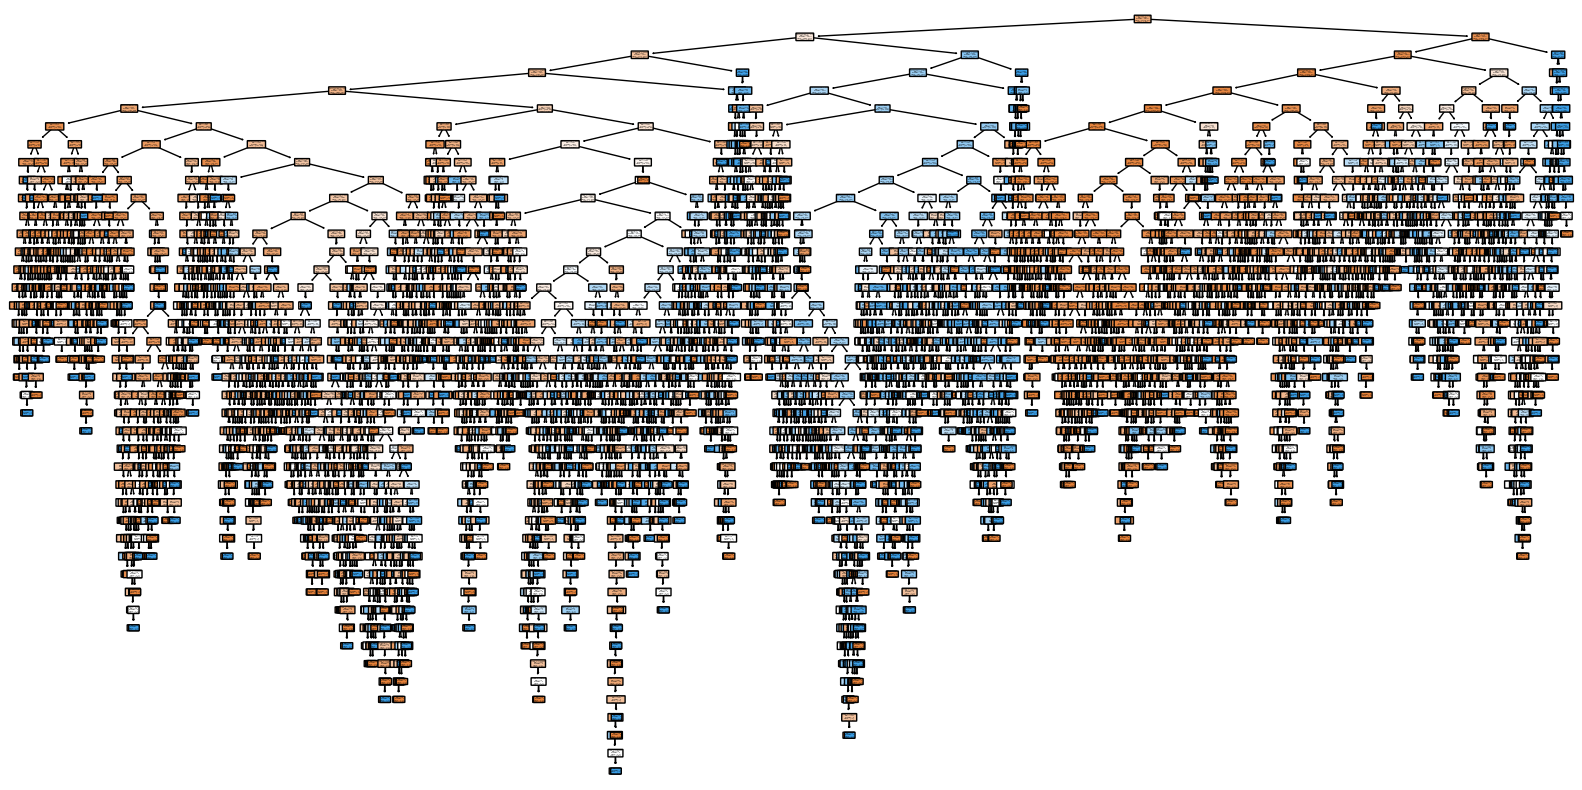

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True, rounded=True)
plt.show()


## Testing Dataset Preprocessing

In [10]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]
data_test = pd.read_csv('adult.test', names=names, skipinitialspace=True)
data_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [11]:
# Drop any rows with missing values
data_test = data_test.dropna()

# Normalizing the data 
data_test= data_test[data_test.age !="|1x3 Cross validator"]

most_common_workclass = data_test["workclass"].mode()[0]
most_common_occupation = data_test["occupation"].mode()[0]
most_common_country = data_test["native-country"].mode()[0]

data_test['workclass'].replace('?', most_common_workclass, inplace=True)
data_test['occupation'].replace('?', most_common_occupation, inplace=True)
data_test['native-country'].replace('?', most_common_country, inplace=True)

data_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


## Label Encoding

In [12]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for col in categorical_columns:
    data_test[col] = label_encoder.fit_transform(data_test[col])

# Split the data into features (X) and target variable (y)
X = data_test.drop('income', axis=1)
y = data_test['income']

## Predict the income level with test dataset

In [13]:
# Predictions on the test set
y_pred = dt_model.predict(X)

## Model Performance Evaluation

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Report
report = classification_report(y, y_pred)
print("Classification Report:\n", report)

# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y, y_pred)
print(f"Recall: {recall}")

# F1-score
f1 = f1_score(y, y_pred)
print(f"F1-Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87     12435
           1       0.59      0.61      0.60      3846

    accuracy                           0.81     16281
   macro avg       0.73      0.74      0.74     16281
weighted avg       0.81      0.81      0.81     16281

Accuracy: 0.807198575026104
Precision: 0.5890203978846638
Recall: 0.608164326573063
F1-Score: 0.5984392989637969
Confusion Matrix:
 [[10803  1632]
 [ 1507  2339]]


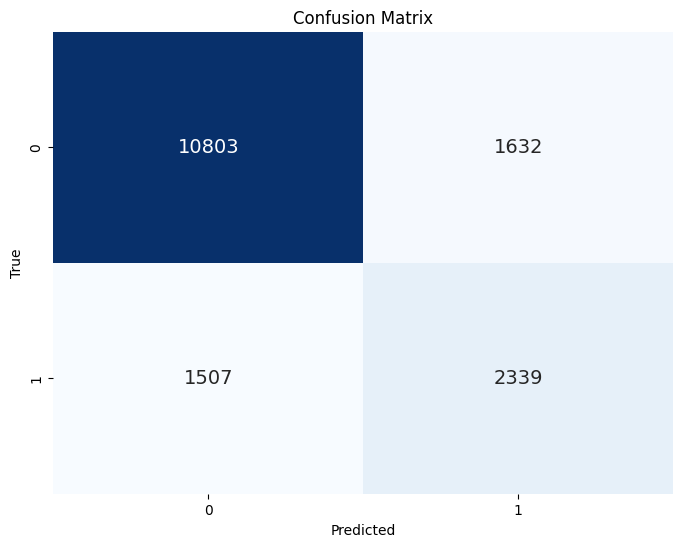

In [15]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()